# Projet Python : Objet Convexe dans une image

# 1. Calcul et remplissage du contour 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
with open("image.pbm", "r") as f:
    image = [list(map(int, line.strip().split())) for line in f.readlines()[3:]]

image1= np.array(image)
print(image1)
len(image1)


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0

30

In [4]:
def trouver_le_point(im):
    for i in range(len(im)):
        for j in range(len(im)-1,-1,-1):
            if im[i][j]==1:
                return [i,j]
        
                
print("Abscisse minimale de notre point : ",trouver_le_point(image1))  

Abscisse minimale de notre point :  [4, 10]


The following cell was generated by GPT-3.5 using this user prompt:

> generate a code that create a gif from a list of matrix

 

In [5]:
# Import the necessary libraries
from PIL import Image
import imageio
# Import numpy library
import numpy as np

# Convert each inner list to a numpy array
matrices = [np.array(matrix) for matrix in matrices]
# Define a function to create a gif from a list of matrices
def create_gif(matrices, output_path):
    # Create a list to store each frame of the gif
    frames = []
    
    # Iterate over the matrices
    for matrix in matrices:
        # Convert the matrix to a PIL Image
        img = Image.fromarray(np.array(matrix, dtype=np.uint8))
        
        # Append the image to the frames list
        frames.append(img)
    
    # Save the frames as a gif using imageio
    imageio.mimsave(output_path, frames, format='GIF')

# Example usage of the function
# Create a list of matrices
matrices = [
    [[1, 0, 1], [0, 1, 0], [1, 0, 1]],
    [[1, 1, 1], [1, 1, 1], [1, 1, 1]],
    [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
]

# Specify the output path for the gif
output_path = 'my_animation.gif'

# Call the function to create the gif
create_gif(matrices, output_path)

NameError: name 'matrices' is not defined

In this example, the function `create_gif` takes a list of matrices as input and generates a gif file at the specified output path. The matrices represent frames of the animation, where each matrix is a 2D array of pixels. The function uses the PIL library to convert each matrix to a PIL Image, and then appends the images to a list. Finally, the list of frames is saved as a gif using the imageio library.

In [6]:
def carre_unite(P,Q):
    if P[0]==Q[0] and P[1]+1==Q[1] : #en bas
        R=[Q[0]-1,Q[1]]
        S=[P[0]-1,P[1]]
        
    elif P[0]==Q[0] and P[1]-1==Q[1] : #en haut
        R=[Q[0]+1,Q[1]]
        S=[P[0]+1,P[1]]
    elif P[0]-1==Q[0] and P[1]==Q[1] : #a gauche
        R=[Q[0],Q[1]-1]
        S=[P[0],P[1]-1]
    elif P[0]+1==Q[0] and P[1]==Q[1] : #a droite 
        R=[Q[0],Q[1]+1]
        S=[P[0],P[1]+1]
        
    else:
        return None, None

    return np.array(R), np.array(S)
        

def contour(image):
    I = image
    
    P1 = trouver_le_point(image)
    P1 = np.array(P1)
    
    P = P1
    D = P1 + np.array([-0.5, -0.5])
    
    C = np.array(D)
    Q = np.array([P[0], P[1] - 1])

    R, S = carre_unite(P1, Q)
    
    while True:
        
        R,S=carre_unite(P,Q)
        
        if I[R[0]][R[1]] ==1 :
            C=np.vstack((C,R-Q))
            P=R
            
        elif I[R[0]][R[1]] ==0 and I[S[0]][S[1]] ==1 :
            C=np.vstack((C,S-P))
            P=S
            Q=R

        elif I[R[0]][R[1]] ==0 and I[S[0]][S[1]] ==0 :
            C=np.vstack((C,S-P))
            Q=S
            
        if np.array_equal(P, P1):
            break
            
        R,S=carre_unite(P,Q)
        
        if I[R[0]][R[1]] ==1 :
            C=np.vstack((C,R-Q))
            P=R
            
        elif I[R[0]][R[1]] ==0 and I[S[0]][S[1]] ==1 :
            C=np.vstack((C,S-P))
            P=S
            Q=R

        elif I[R[0]][R[1]] ==0 and I[S[0]][S[1]] ==0 :
            C=np.vstack((C,S-P))
            Q=S
    
    return C
    
    

resultat_contour = contour(image1)
print("Contour:", resultat_contour)


Contour: [[ 3.5  9.5]
 [ 1.   0. ]
 [ 0.  -1. ]
 [ 0.  -1. ]
 [ 0.  -1. ]
 [ 1.   0. ]
 [ 0.  -1. ]
 [ 1.   0. ]
 [ 0.  -1. ]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 0.  -1. ]
 [ 1.   0. ]
 [ 0.   1. ]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 0.   1. ]
 [ 1.   0. ]
 [ 0.   1. ]
 [ 1.   0. ]
 [ 0.   1. ]
 [ 0.   1. ]
 [ 0.   1. ]
 [ 1.   0. ]
 [ 0.   1. ]
 [-1.   0. ]
 [ 0.   1. ]
 [ 0.   1. ]
 [ 0.   1. ]
 [-1.   0. ]
 [ 0.   1. ]
 [-1.   0. ]
 [ 0.   1. ]
 [-1.   0. ]
 [-1.   0. ]
 [-1.   0. ]
 [ 0.   1. ]
 [-1.   0. ]
 [ 0.  -1. ]
 [-1.   0. ]
 [-1.   0. ]
 [-1.   0. ]
 [ 0.  -1. ]
 [-1.   0. ]
 [ 0.  -1. ]
 [-1.   0. ]
 [ 0.  -1. ]
 [ 0.  -1. ]
 [ 0.  -1. ]
 [-1.   0. ]]


In [7]:
def listepoint(vec):
    liste_pts=[0]
    for i in resultat_contour:
        pts=i+liste_pts[-1]
        liste_pts.append(pts)
    
    liste_pts=liste_pts[1:]
    liste_pts.append(liste_pts[0])
    liste_pts=np.array(liste_pts)
    
    return liste_pts
liste_pts=listepoint(resultat_contour)
liste_pts


array([[ 3.5,  9.5],
       [ 4.5,  9.5],
       [ 4.5,  8.5],
       [ 4.5,  7.5],
       [ 4.5,  6.5],
       [ 5.5,  6.5],
       [ 5.5,  5.5],
       [ 6.5,  5.5],
       [ 6.5,  4.5],
       [ 7.5,  4.5],
       [ 8.5,  4.5],
       [ 9.5,  4.5],
       [ 9.5,  3.5],
       [10.5,  3.5],
       [10.5,  4.5],
       [11.5,  4.5],
       [12.5,  4.5],
       [13.5,  4.5],
       [13.5,  5.5],
       [14.5,  5.5],
       [14.5,  6.5],
       [15.5,  6.5],
       [15.5,  7.5],
       [15.5,  8.5],
       [15.5,  9.5],
       [16.5,  9.5],
       [16.5, 10.5],
       [15.5, 10.5],
       [15.5, 11.5],
       [15.5, 12.5],
       [15.5, 13.5],
       [14.5, 13.5],
       [14.5, 14.5],
       [13.5, 14.5],
       [13.5, 15.5],
       [12.5, 15.5],
       [11.5, 15.5],
       [10.5, 15.5],
       [10.5, 16.5],
       [ 9.5, 16.5],
       [ 9.5, 15.5],
       [ 8.5, 15.5],
       [ 7.5, 15.5],
       [ 6.5, 15.5],
       [ 6.5, 14.5],
       [ 5.5, 14.5],
       [ 5.5, 13.5],
       [ 4.5,

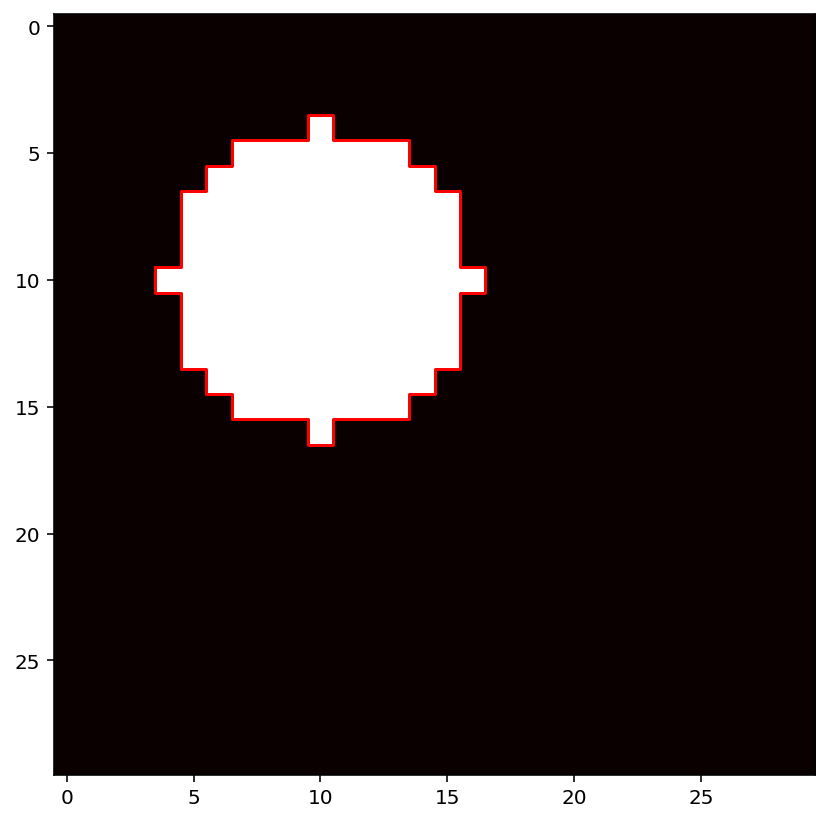

In [8]:
plt.plot(liste_pts[:,0],liste_pts[:,1], 'red')
plt.imshow(image1, cmap='hot')
plt.show()

In [9]:
"""import matplotlib.animation as animation
from matplotlib import animation, rc
from IPython.display import HTML
fig,ax = plt.subplots()
ax.set_xlim([0, 30])
ax.set_ylim([30, 0])

background = ax.imshow(image1, cmap='hot')

pointAnime, = ax.plot([], [], lw=2, color='magenta')

def init():
    pointAnime.set_data([], [])
    return (pointAnime,)

def animate(i):
    x = liste_pts[:,0][:i]
    y = liste_pts[:,1][:i]
    pointAnime.set_data(x, y)

    return (pointAnime,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(liste_pts)+1, interval=50, blit=True)

HTML(anim.to_jshtml())"""

"import matplotlib.animation as animation\nfrom matplotlib import animation, rc\nfrom IPython.display import HTML\nfig,ax = plt.subplots()\nax.set_xlim([0, 30])\nax.set_ylim([30, 0])\n\nbackground = ax.imshow(image1, cmap='hot')\n\npointAnime, = ax.plot([], [], lw=2, color='magenta')\n\ndef init():\n    pointAnime.set_data([], [])\n    return (pointAnime,)\n\ndef animate(i):\n    x = liste_pts[:,0][:i]\n    y = liste_pts[:,1][:i]\n    pointAnime.set_data(x, y)\n\n    return (pointAnime,)\n\nanim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(liste_pts)+1, interval=50, blit=True)\n\nHTML(anim.to_jshtml())"

In [10]:
"""
import matplotlib.animation as animation
from IPython.display import HTML


fig, ax = plt.subplots()
ax.set_xlim([0, 30])
ax.set_ylim([30, 0])


background = ax.imshow(image1, cmap='hot')


pointAnime, = ax.plot([], [], lw=2, color='magenta')


def init():
    pointAnime.set_data([], [])
    return (pointAnime,)


def animate(i):
    x = liste_pts[:, 0][:i]
    y = liste_pts[:, 1][:i]
    pointAnime.set_data(x, y)
    return (pointAnime,)


anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(liste_pts)+1, interval=50, blit=True)


anim.save('animation.gif', writer='imagemagick')


HTML(anim.to_jshtml())"""

"\nimport matplotlib.animation as animation\nfrom IPython.display import HTML\n\n\nfig, ax = plt.subplots()\nax.set_xlim([0, 30])\nax.set_ylim([30, 0])\n\n\nbackground = ax.imshow(image1, cmap='hot')\n\n\npointAnime, = ax.plot([], [], lw=2, color='magenta')\n\n\ndef init():\n    pointAnime.set_data([], [])\n    return (pointAnime,)\n\n\ndef animate(i):\n    x = liste_pts[:, 0][:i]\n    y = liste_pts[:, 1][:i]\n    pointAnime.set_data(x, y)\n    return (pointAnime,)\n\n\nanim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(liste_pts)+1, interval=50, blit=True)\n\n\nanim.save('animation.gif', writer='imagemagick')\n\n\nHTML(anim.to_jshtml())"

In [11]:
import cv2

image = cv2.imread('chien.jpg', cv2.IMREAD_GRAYSCALE)


sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)


gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)


gradient_magnitude_normalized = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)
_,thresholded = cv2.threshold(gradient_magnitude_normalized, 50, 255, cv2.THRESH_BINARY)


contours, _ = cv2.findContours(thresholded.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


contour_image = image.copy()


cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)


plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Image Originale')
plt.subplot(132), plt.imshow(gradient_magnitude_normalized, cmap='gray'), plt.title('Filtre Sobel')
plt.subplot(133), plt.imshow(contour_image, cmap='gray'), plt.title('Contours')

plt.show()

[ WARN:0@0.065] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('chien.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/deriv.cpp:419: error: (-215:Assertion failed) !_src.empty() in function 'Sobel'


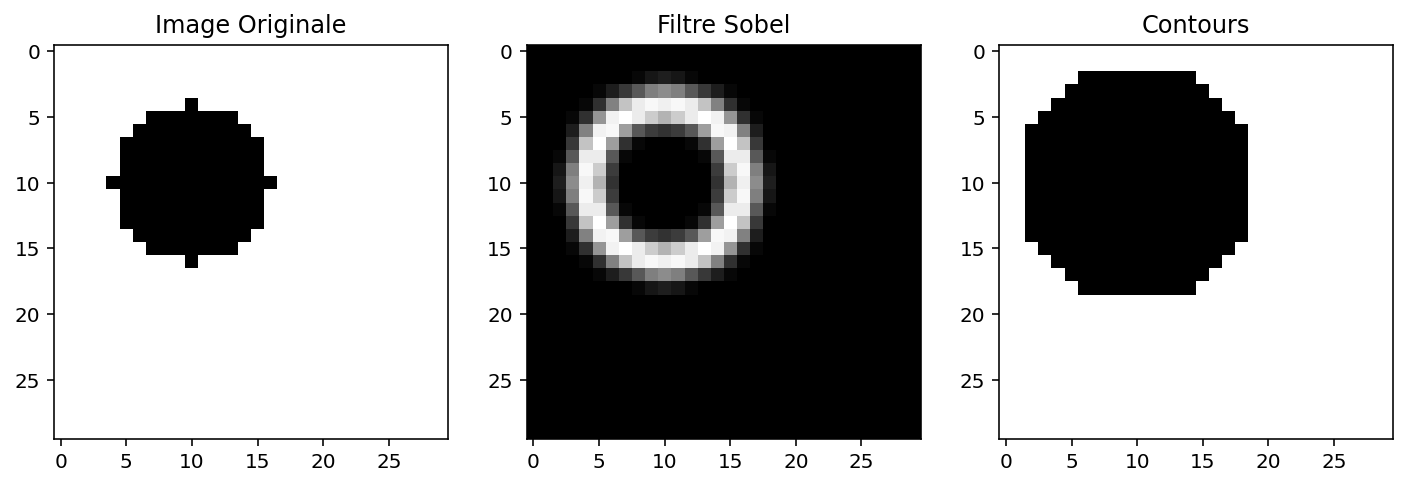

In [12]:
import cv2

image = cv2.imread('image.pbm', cv2.IMREAD_GRAYSCALE)


sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)


gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)


gradient_magnitude_normalized = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)
_,thresholded = cv2.threshold(gradient_magnitude_normalized, 50, 255, cv2.THRESH_BINARY)


contours, _ = cv2.findContours(thresholded.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


contour_image = image.copy()


cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)


plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Image Originale')
plt.subplot(132), plt.imshow(gradient_magnitude_normalized, cmap='gray'), plt.title('Filtre Sobel')
plt.subplot(133), plt.imshow(contour_image, cmap='gray'), plt.title('Contours')

plt.show()

In [13]:
n=len(liste_pts)
print("Le périmètre est de : ", n)

somme_matrice=np.sum(image1)
print(f"Aire : {somme_matrice} pixels")

Le périmètre est de :  53
Aire : 113 pixels


In [14]:
#séparer dans image en deux coordonnées 
def remplissage_contour(image_p, C):

    image=cv2.imread(str(image_p), cv2.IMREAD_GRAYSCALE)
    mat_zero=np.ones(image.shape)*128
    listep=listepoint(C)
    listep=np.array(listep)

    for i in range(len(C)):
        if C[i][0]==-1 and C[i][1]==0 :
            a=(listep[i]+np.array([0.5,0.5])).astype(int)
            b=(listep[i]+np.array([0.5,-0.5])).astype(int)
            mat_zero[a[1],a[0]]=0
            mat_zero[b[1],b[0]]=255
        if C[i][0]==1 and C[i][1]==0:
            c=(listep[i]-np.array([0.5,0.5])).astype(int)
            d=(listep[i]+np.array([-0.5,0.5])).astype(int)
            mat_zero[c[1],c[0]]=0
            mat_zero[d[1],d[0]]=255

    frames=[]
    pixelCouleur=0
    for j in range(len(image)):
        for i in range(len(image)):
            p=mat_zero[i,j]
            if p==0:
                pixelCouleur=0
            if p==255:
                pixelCouleur=255
            if p==128:
                if pixelCouleur==255:
                    mat_zero[i,j]=255
                if pixelCouleur==0:
                    mat_zero[i,j]=0 
                frames.append(mat_zero/255)
    return mat_zero, frames
im, frames = remplissage_contour('image.pbm',resultat_contour)

In [15]:
frames=np.array(frames)
for i in range(len(frames)):
    plt.imshow(frames[i])
    plt.savefig(str(i)+"output.jpg")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f2edc0e45e0> (for post_execute):


KeyboardInterrupt: 

In [16]:
import imageio as iio
frames = np.stack([iio.imread(str(i)+"output.jpg") for i in range(58)], axis = 0)
iio.mimwrite('remplissage.gif', frames)

/tmp/ipykernel_788/3429229769.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames = np.stack([iio.imread(str(i)+"output.jpg") for i in range(58)], axis = 0)


In [0]:

#listframes_uint8 = [frame.astype('uint8') for frame in listframes]


In [0]:

#import imageio
#output_file = "animgif.gif"

#imageio.mimsave(output_file, listframes_uint8)

# Application

>Ecrire un programme qui réduit le rayon du disque de l’image de l’exemple précédent. Le nombre de cercles supprimés sera un paramètre de la fonction.



# Erosion dilatation
>kernel : on crée un noyau qui sera notre base pour savoir si on étend ou rétréci notre objet
>Dilatation : étend en fonction de la valeur du pixel sur le noyau 1 ou 0 on tend a n'avoir plus que l'objet
>Erosion : inverse de dilatation on tend a n'avoir plus que le fond
>Gradient : différence entre dilatation et erosion

In [0]:
import cv2

img_test = cv2.imread('pikachu.png', cv2.IMREAD_GRAYSCALE)


kernel_test = np.ones((10,10), np.uint8)

img_erosion_test = cv2.erode(img_test, kernel_test, 3)
img_dilation_test = cv2.dilate(img_test, kernel_test, 3)


cv2.imshow('Original', img_test)
cv2.imshow('Erosion', img_erosion_test)
cv2.imshow('Dilation', img_dilation_test)
cv2.imshow('Forme de base de notre erosion',kernel_test)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [0]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(img_test, cmap='gray')
plt.title('Original')

plt.subplot(1, 4, 2)
plt.imshow(img_erosion_test, cmap='gray')
plt.title('Erosion')

plt.subplot(1, 4, 3)
plt.imshow(img_dilation_test, cmap='gray')
plt.title('Dilation')

plt.subplot(1, 4, 4)
plt.imshow(kernel_test, cmap='gray')
plt.title('Forme de base de notre erosion')

plt.show()

In [0]:
img = cv2.imread('image.pbm', cv2.IMREAD_GRAYSCALE)

img = cv2.bitwise_not(img)

rayon = 15
kernel_c = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*rayon+1, 2*rayon+1), (rayon, rayon))


img_erosion = cv2.erode(img, k_c, 1)
img_dilation = cv2.dilate(img, k_c, 1)
img_gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel_c)

cv2.imshow('Original', img)
cv2.imshow('Erosion', img_erosion)
cv2.imshow('Dilation', img_dilation)
cv2.imshow('Gradient', img_gradient)
cv2.imshow('Forme de base de notre erosion',kernel_c)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [0]:
plt.figure(figsize=(18, 4))

plt.subplot(1, 5, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1, 5, 2)
plt.imshow(img_erosion, cmap='gray')
plt.title('Erosion')

plt.subplot(1, 5, 3)
plt.imshow(img_dilation, cmap='gray')
plt.title('Dilation')

plt.subplot(1, 5, 4)
plt.imshow(img_gradient, cmap='gray')
plt.title('Gradient')

plt.subplot(1, 5, 5)
plt.imshow(kernel_c, cmap='gray')
plt.title('Forme de base de notre erosion')

plt.show()

# Enveloppe Convexe

In [0]:
from functools import cmp_to_key
#Avec ls angles
image_pts=image1

points = np.column_stack(np.where(image_pts > 0))

points2=sorted(points,key=lambda x: [x[0],x[1]])

pole = min(points2, key=lambda p: p[0])

#Distance entre deux points
def distance(x,y):
    r=np.sqrt(np.power(x[0]-y[0],2)+np.power(x[1]-y[1],2)) 
    return r

#On utilise la fonction produit vectoriel pour savoir l'orientation:
#nul==colinéaires
#positif==tourne à gauche
#négatif==tourne à droite

def Produit_vectoriel(p1, p2, p3):
    return ((p2[0] - p1[0]) * (p3[1] - p1[1])) - ((p3[0] - p1[0]) * (p2[1] - p1[1]))

  
def angle_polaire(p2, p3):
    
    P = Produit_vectoriel(pole, p2, p3)
    if P == 0:
        if distance(pole, p3) >= distance(pole, p2):
            return - 1
        else:
            return 1
    if (P > 0):
        return -1 
    else:
        return 1  

#Je converti angle_polaire en fonction cle pour pouvoir prendre en compte les deux points de la fonction
#Je ne peux pas utiliser une clé lambda
points_pol = sorted(points, key=cmp_to_key(angle_polaire))

#je rajoute le pole a la fin pour bien fermer l'enveloppe
points_pol.append(pole)
points_pol=np.array(points_pol)

In [0]:
#Techniques Avec Les Slopes plutôt que les angles polaires

points = np.column_stack(np.where(image_pts > 0))


points2=sorted(points,key=lambda x: [x[0],x[1]])  

pole = min(points2, key=lambda p: p[0])


def get_slope(p, q):
    if p[0] == q[0]:
        return float('inf')
    else:
        return float(p[1] - q[1])/(p[0] - q[0])

#On les tris dans le sens horaire
points3=sorted(points2,key=lambda p: (get_slope(p, pole), -p[1], p[0]))
points3.insert(0, pole)
points3=np.array(points3)


In [0]:

class Pile:
    def __init__(self):
        self.elements = []

    def empiler(self, point):
        self.elements.append(point)

    def depiler(self):
        if self.hauteur() > 0:
            self.elements.pop()

    def hauteur(self):
        return len(self.elements)

    def haut(self):
        if self.hauteur() > 0:
            return self.elements[-1] #On prend [-1] pour avoir le dernier termes de la pile insérer
        return None

    def second(self):
        if self.hauteur() > 1:
            return self.elements[-2] #On prend [-2] pour avoir l'avant dernier terme de la pile inséré
        return None


def enveloppe_convexe(pts): 
    n=len(pts)
    ma_pile=Pile() 
    if n>3:  
        ma_pile.empiler(pts[0])
        ma_pile.empiler(pts[1])
        ma_pile.empiler(pts[2])
        for i in range(3, n):           
            while (ma_pile.hauteur() >= 2) and (Produit_vectoriel(ma_pile.second(), ma_pile.haut(), pts[i]) < 0):
                ma_pile.depiler()
            ma_pile.empiler(pts[i])

    return ma_pile.elements



In [0]:
#Résultat avec les slopes

x = [point[0] for point in points2]
y = [point[1] for point in points2]

plt.scatter(x, y, label='Points de la liste', color='black')

e_convexe =enveloppe_convexe(points3)
e_convexe=np.array(e_convexe)


x = [point[0] for point in e_convexe]
y = [point[1] for point in e_convexe]
plt.plot(x, y, label='Points de l\'enveloppe', color='orange',marker='o')
plt.title("Enveloppe Convexe en utilisant la méthode de la pente")
plt.legend()
plt.show()

In [0]:
#Résultat avec les angles polaires

x = [point[0] for point in points2]
y = [point[1] for point in points2]

plt.scatter(x, y, label='Points de la liste', color='black')

e_convexe1 =enveloppe_convexe(points_pol)
e_convexe1=np.array(e_convexe)


x = [point[0] for point in e_convexe1]
y = [point[1] for point in e_convexe1]
plt.plot(x, y, label='Points de l\'enveloppe', color='orange',marker='o')
plt.title("Enveloppe Convexe avec la méthode des angles polaires")
plt.legend()
plt.show()

In [0]:
#Utiliser plutôt la méthode de la pente car dans celle des angles j'ai directement implementé le pole dans la fonction
#Dans la boucle la valeur du pole ne change pas a chaque itération 

def feuilletage(pts):
    listepolygone=[]
    ensemble=np.array(pts)
    
    while len(ensemble) > 3:
        
        ensemble=sorted(ensemble,key=lambda x: [x[0],x[1]])
        pole = min(ensemble, key=lambda x: [x[0],x[1]])
        
        points3=sorted(ensemble,key=lambda p: (get_slope(p, pole), -p[1], p[0]))
        points3.insert(0, pole)
        points3=np.array(points3)
        
        polyg=enveloppe_convexe(points3)
        polyg=np.array(polyg)

        ensemble = np.array([point for point in ensemble if not any((point == p).all() for p in polyg)])
        
        listepolygone.append(polyg)   
        
    return listepolygone

In [0]:
liste_feuilletage=feuilletage(points)


for i in range(len(liste_feuilletage)) :
    x=liste_feuilletage[i][:,0]
    y=liste_feuilletage[i][:,1]
    plt.plot(x,y)


x = [point[0] for point in points2]
y = [point[1] for point in points2]

plt.scatter(x, y,color='black')
plt.show()

In [0]:
random_pts = np.random.rand(100, 2) * 100

In [0]:
x = [point[0] for point in random_pts]
y = [point[1] for point in random_pts]
plt.scatter(x,y)
plt.show()

rd_pts=sorted(random_pts,key=lambda x: [x[1],x[0]])  # Sort all the points based on y-coordinates

pole = min(rd_pts, key=lambda p: p[0])

rd_pts_fin = sorted(rd_pts, key=cmp_to_key(angle_polaire))

rd_pts_fin.append(pole)
rd_pts_fin=np.array(rd_pts_fin)

x = [point[0] for point in rd_pts_fin]
y = [point[1] for point in rd_pts_fin]

plt.scatter(x, y, label='Points de la liste', color='black')

e_convexe =enveloppe_convexe(rd_pts_fin)
e_convexe=np.array(e_convexe)


x = [point[0] for point in e_convexe]
y = [point[1] for point in e_convexe]
plt.plot(x, y, label='Points de l\'enveloppe', color='orange',marker='o')
plt.title("Enveloppe Convexe avec la méthode des angles polaires")
plt.legend()
plt.show()

In [0]:
liste_feuilletage=feuilletage(random_pts)


for i in range(len(liste_feuilletage)) :
    x=liste_feuilletage[i][:,0]
    y=liste_feuilletage[i][:,1]
    plt.plot(x,y)


x = [point[0] for point in random_pts]
y = [point[1] for point in random_pts]

plt.scatter(x, y,color='black')
plt.show()

In [0]:
a = [1,5,1,4,3,4] # First column
b = [9,4,0,4,0,2] # Second column
ind = np.lexsort((b,a))# Sort by a, then by b
#Index pour organiser les pts
print(ind)
[[a[i],b[i]] for i in ind]

In [0]:
a=[[[3,2],0],[[7,5],3],[[2,4],1],[[1,8],2]]
sorted_a = sorted(a, key=lambda x: x[1])
result = [x[0] for x in sorted_a]
print(result)
print(a[-1][0])

In [0]:
a=[[3,2],[5,5]]
a= np.array(a)
b=np.setdiff1d(a,[3,2])
b


In [0]:
a=Pile()
a.empiler([3,10])
a.empiler([1,1])
a.empiler([9,9])
print(a.elements)

# Convexité

Si on construit un polygone dont les sommets se trouvent sur les noeuds d'une grille formée de carrés (unité d'aire) tel que i est le nombre de points de la grille strictement intérieurs au polygone et b le nombre de points sur les côtés du polygone alors l'aire de ce polygone est : A = i + b/2 - 1 (A-b/2+1=I)

>https://www.maths-et-tiques.fr/index.php/detentes/theoreme-de-pick#:~:text=Si%20on%20construit%20un%20polygone,%2B%20b%2F2%20%2D%201.



In [0]:
mon_enveloppe=e_convexe1

plt.plot(mon_enveloppe[:,0],mon_enveloppe[:,1],'red')
plt.show()

In [0]:
mon_enveloppe=e_convexe1
def aire_e_convexe(points):
    n = len(points)
    area = 0.
    for i in range(n):
        x1, y1 = points[i]
        x2, y2 = points[(i + 1) % n] #Prendre le modulo pour pouvoir prendre en compte le dernier terme points[n]
        area += (x1 * y2 - x2 * y1)
    return 0.5 * abs(area)

def convexe_ou_pas(enveloppe, objet):
    #Aire de l'enveloppe convexe
    aire = aire_e_convexe(enveloppe)
    print(f"Aire de l'enveloppe convexe: {aire}")
    
    #Nombre de points de l'enveloppe convexe
    points_bord = Nbr_points_bord(enveloppe)
    print(f"Nombre de points sur le bord de l'enveloppe convexe: {points_bord}")
    
    #Nombre de points attendu d'après la formule de Pick
    attendu = Nbr_points_pick(aire, points_bord)
    print(f"Nombre de points de l'objet attendu selon la formule de Pick: {attendu}")
    
    #Nombre de points réels présent dans l'enveloppe convexe
    reel = len(objet)-points_bord  # Nombre réel de points entiers dans l'objet
    print(f"Nombre de points réels présent dans l'enveloppe:{reel}")
    
    if reel == attendu :
        return print("L'objet est bien convexe")
    else :
        return print("L'objet n'est pas convexe")

def Nbr_points_pick(aire, pts_bord):
    I= aire - (pts_bord/2) +1
    return I

#L'intérêt de calculer le nbr_de_pts via pgcd c'est que dans notre cas 
#L'enveloppe convexe passe au dessus de pts qui ne sont donc pas strictement à l'intérieur du polynome
#Le pgcd les prend en compte comme faisant partie apparentière de l'enveloppe
#la ou la longueur de notre enveloppe est de 12 (point final=point initiale)
#le nombre parcouru est lui de 16

def Nbr_points_bord(points):
    #c = []
    n = len(points)
    #for i in range(n-1):
        
        #On n'a pas besoin de rajouter +1 car on va de i en i
        #si on effectue la fonction sur un seul segment alors ou le -1 est de rigueur
        #Hors ici on utilise tous les points deux fois si on mets plus 1 des doublons vont se rajouter
        #Une autre solution pourrait être de faire +1 et de soustraire au pgcd final i avec i le nbre de pts pris en compte 2x
        
        #a=np.gcd(np.abs(points[i][0]-points[i+1][0]),np.abs(points[i][1]-points[i+1][1]))
        #c.append(a)
    
    #On calcul le pgcd du dernier pts avec le premier, dans notre cas le deriner pts est le premier.
    #Donc le pgcd sera nul mais au cas ou il vaut mieux vérifier.
    #d=np.gcd(np.abs(points[-1][0]-points[0][0]),np.abs(points[-1][1]-points[0][1]))
    #c.append(d)
    #c=np.sum(c)
    #return c
    return n





In [0]:
points_objet=points2
convexe_ou_pas(mon_enveloppe,points_objet)